# salamوارد کردن کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import pylab as pl
from sklearn.metrics import r2_score
from sklearn import linear_model
%matplotlib inline

# خواندن دیتا و چاپ پنج خط آخر

In [2]:
alldt=pd.read_csv('house.csv')
alldt.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


#  NAN حذف ردیف هایی که ایتم وارد نشده دارند یا همان 

In [3]:
alldt.dropna(inplace=True)

# آیتم 'مساحت' که به فرمت رشته می باشد را در اینجا به اینتجر تبدیل میکنیم 

In [4]:
before= type(alldt.Area[0])
before

str

In [5]:
alldt['Area'] = alldt['Area'].str.replace(',', '')
alldt.Area=alldt.Area.astype('int64')
after = type(alldt.Area[0])
after

numpy.int64

# پاکسازی داده های پرت در قسمت مساحت!

### از نظر ما داده ای پرت است که مساحت آن بیش از 400 متر باشد! 

In [6]:
print(np.max(alldt.Area))
print(np.min(alldt.Area))
#فقط برای چک کردن 
#اینطور که معلومه داده های پرت بزرگ داریم فقط
#برای اثباتش هم میشه از میانگین استفاده کرد
print(np.mean(alldt.Area))

16160000000
30
8802191.396122685


In [7]:
part_index=alldt.query('Area>400').index.tolist()
#پیدا کردن ایندکس داده های پرت

In [8]:
alldt=alldt.drop(part_index)
#حذف ردیف هایی که مساحت آنها پرت است

In [9]:
np.mean(alldt.Area)
#کاملا مشخص است که داده های پرت پاکسازی شده
#با بدست آوردن و ماکس و مین هم میشه فهمید

102.59315589353612

# پاکسازی داده های پرت اتاق

In [10]:
print(np.min(alldt.Room))
print(np.max(alldt.Room))
#مشخص شد که تنها داده پرت ما در قسمت اتاق داده هایی است که اتاقشان صفر است

0
5


In [11]:
part_index_room=alldt.query('Room==0').index.tolist()
alldt=alldt.drop(part_index_room)

In [12]:
np.min(alldt.Room)

1

# عددی کردن آدرس با لیبل انکودر 

In [13]:
from sklearn import preprocessing 
label=preprocessing.LabelEncoder()

In [14]:
alldt['Address']=label.fit_transform(alldt['Address'])

In [15]:
print(alldt['Address'].unique())

[154 115 150 148 104  12 180  98 133 185  69 118 152  97 176  11 161 139
 187  51 178 145  59 126   1 109  49 113 120 123  13 111 125  25  39 112
 140  20 155 106  34 162 132 181   3  91  38 136  26  22  72  86 156  50
  79  74 122 108  18  21 117  23  67  44  60 144 116  28  55  75  58  66
  63  35  30 130 186 124 103 174 121   9  42  41  61  87 110 164   0  83
  65 114  85  89 160  76 158  77 105  40  84   5 159  82  17 188  10  36
  43  95 129  73 143 182  94  99 170  27  48  47 153   6 168 100 184 107
 177  62 102  54 165  19 146  14  88 172  90 147  33 175 167  31  46  16
 135 134 149 179   4 138 119  45  70 127  53  57  92 163   2  37  68 166
  78 131 128  56 169  96  15 141 151 137  80  64  29  81  24  93 157 171
  32   8   7  52 173 142 101  71 183]


In [16]:
alldt.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,154,1.850000e+09,61666.67
1,60,1,True,True,True,154,1.850000e+09,61666.67
2,79,2,True,True,True,115,5.500000e+08,18333.33
3,95,2,True,True,True,150,9.025000e+08,30083.33
4,123,2,True,True,True,148,7.000000e+09,233333.33


# ماشین لرنینگ

# 
# 
# پلات کشی و چک کردن موارد

In [17]:
mask=np.random.rand(len(alldt))<.8
train=alldt[mask]
test=alldt[~mask]

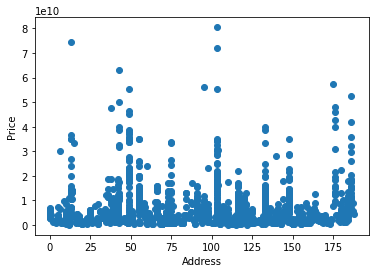

In [18]:
mpl.scatter(train.Address,train.Price)
mpl.xlabel('Address')
mpl.ylabel('Price')
mpl.show()

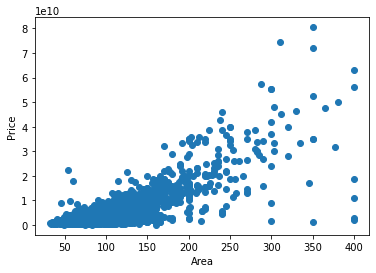

In [19]:
mpl.scatter(train.Area,train.Price)
mpl.xlabel('Area')
mpl.ylabel('Price')
mpl.show()

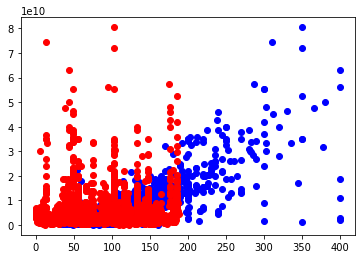

In [20]:
fig=mpl.figure()
add=fig.add_subplot(111)
add.scatter(train.Area,train.Price,color='blue')
add.scatter(train.Address,train.Price,color='red')
mpl.show()

# با چک کردن های متعدد خارج از این کد متوجه شدم ترکیب 3 تایی آدرس و مساحت و انباری
# بهترین نتیجه ممکن را می دهد

In [21]:
reg=linear_model.LinearRegression()
x=np.asanyarray(train[['Address','Area','Warehouse']])
y=np.asanyarray(train[['Price']])
reg.fit(x,y)
shib1=reg.coef_[0,0]
shib2=reg.coef_[0,1]
shib3=reg.coef_[0,2]
intercept=reg.intercept_[0]
print(shib1,shib2,shib3)
print(intercept)

415335.3958658774 109775091.90547688 618683446.0282167
-6771590869.100596


In [22]:
x=np.asanyarray(test[['Address','Area','Warehouse']])
y=np.asanyarray(test[['Price']])
y_predict=reg.predict(x)
R2=r2_score(y,y_predict)
print(R2)

0.6776224307954796
